<center>
    <img style="float: left;" src="Mix_colour.png" width="200"></img>
</center>

<br/><br/>
<br/><br/>

# Hypothesis Testing: A/B Testing

In this notebook you will work on understanding how A/B tests, an important application of Hypothesis Testing, are performed. In the reading material we discussed how to estimate the effect of the different treatments applied to different groups in an experiment (e.g. a medical trial, but not necessarily so). This assignment will step you through how to perform those estimates.

## Data 

Let's assume we have a total of 800 combustion engines. We divide them into two equally large groups, group A and B. Group A constitutes of the engines we want to make a new test on, and group B is the control group (C). We did the test and collected the results. Both groups A and B are assumed to have a test result which is normally distributed with equal variance. 

Let's get started from importing some useful packages and loading the dataset `AB_test_data_assign2.csv`.

In [19]:
import numpy as np
import pandas as pd

dfAB = pd.read_csv('/home/jovyan/Data/AB_test_data_assign2.csv')

Let's get more familiar with the dataset. 

Note that it consists of collected values and corresponding group.

In [20]:
dfAB.head()

,test_value,group
0,3.231587,A
1,2.615279,A
2,0.354600,A
3,1.891616,A
4,2.521336,A


In [21]:
dfAB['group'].unique()

array(['A', 'B'], dtype=object)

We can visualize an example by running the following code.

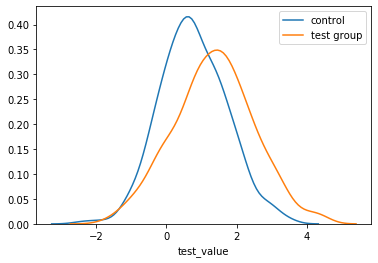

In [22]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

plt.figure()
sns.distplot(dfAB[dfAB['group']=='B']['test_value'], hist=False, label='control')
sns.distplot(dfAB[dfAB['group']=='A']['test_value'], hist=False, label='test group')
plt.legend()
plt.show()

As explained before, we believe that a valid hypothesis is group 'A' which has been subjected to a different treatment, is different from group 'B' the control. As you can see from the plot above, it does look like there is some effect. However, since the differences can stem from random effects, it is hard to trust our judgement that there is some effect. Rather, to test that this is a valid hypothesis, we should perform some test. 

### Q1:
To start with the test, which of the following should be the null hypothesis? 

1. The two groups does not come from the same normal distribution.
2. The two groups come from the same normal distribution.

In [23]:
# Fill in the number corresponding to your answer inside the brackets: Q1_answer = [Your answer]

### START ANSWER HERE ###
Q1_answer = [2]
### END ANSWER HERE ###

In [24]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(Q1_answer)=='beb4dbf9af069aa2df7b147229965085':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [25]:
# nbgrader cell


### Q2:

In the corresponding chapter we talked about possible t-tests one can use to check if the null hypothesis holds or not with some certainty. Now let's perform an actual check of the difference between the groups. Implement the t-test below. 

**Hint:** 
* import the necessary package
* implement t-test as `appropriate_test = ttest_ind()` with correct input

In [26]:
# (approx. 2 lines of code)
### START ANSWER HERE ###
from scipy.stats import ttest_ind
approprite_test = ttest_ind(
    a=dfAB[dfAB['group']!='control']['test_value'],
    b=dfAB[dfAB['group']=='control']['test_value'])
### END ANSWER HERE ###

In [27]:
appropriate_test[0]

nan

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>appropriate_test[0]</td> 
        <td>7.857989786199241 </td> 
    </tr>

</table>

In [ ]:
# nbgrader cell


### Q3:

Recall from Chapter 7, that one can use the results of t-test to weigh the strength of the evidence that you should reject the null hypothesis. Based on the above results, what is the statistical significance of the null hypothesis in our case?

Use `your_answer = `.

In [18]:
#(approx. 1 line of code)
### START ANSWER HERE ###
your_answer = appropriate_test[1]
### END ANSWER HERE ###
print('The statistical significance of the null hypothesis is ', your_answer)

The statistical significance of the null hypothesis is  nan


**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>The statistical significance of the null hypothesis is</td> 
        <td>1.2617627892854591e-14 </td> 
    </tr>

</table>

In [ ]:
# nbgrader cell


# Good job! 